In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [55]:
%matplotlib inline

In [56]:
#path to project
path = r'/Users/rendo/A6_Shootings'

In [57]:
Shootings = pd.read_csv(os.path.join(path, '02 Data','prepared Data','Mass_murders.csv'))

In [58]:
Shootings.head()

,Unnamed: 0,Incident ID,Incident Date,State,City Or County,Address,Victims Killed,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested
0,0,2728246,12-Oct-23,Minnesota,Princeton,200 block of 190th Ave NE,0,5,0,1,1
1,1,2727876,10-Oct-23,Wisconsin,Madison,116 Milky Way,1,3,0,0,0
2,2,2725771,8-Oct-23,Illinois,Chicago,316 W Erie St,0,8,0,0,0
3,3,2725838,8-Oct-23,Pennsylvania,Indiana,640 N 5th Ave,1,8,0,0,0
4,4,2726444,8-Oct-23,Louisiana,Gonzales,616 N Tobey Ave,0,4,0,0,0


In [59]:
Shootings.columns

Index(['Unnamed: 0', 'Incident ID', 'Incident Date', 'State', 'City Or County',
       'Address', 'Victims Killed', 'Victims Injured', 'Suspects Killed',
       'Suspects Injured', 'Suspects Arrested'],
      dtype='object')

In [60]:
Shootings.describe()

,Unnamed: 0,Incident ID,Victims Killed,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested
count,3084.000000,3.084000e+03,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000
mean,1549.740921,1.895338e+06,1.029183,4.187419,0.061933,0.049287,0.556420
std,894.152460,5.889837e+05,1.842780,8.203297,0.252892,0.273437,1.020577
min,0.000000,7.394510e+05,0.000000,0.000000,0.000000,0.000000,0.000000
25%,775.750000,1.381762e+06,0.000000,3.000000,0.000000,0.000000,0.000000
50%,1552.500000,2.052344e+06,1.000000,4.000000,0.000000,0.000000,0.000000
75%,2323.250000,2.386873e+06,1.000000,5.000000,0.000000,0.000000,1.000000
max,3095.000000,2.728246e+06,58.000000,441.000000,3.000000,5.000000,11.000000


C:\Users\rendo\AppData\Local\Temp\ipykernel_39008\3765229823.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Shootings['Victims Killed'], bins=60) # Shows extreme values


<Axes: xlabel='Victims Killed', ylabel='Density'>

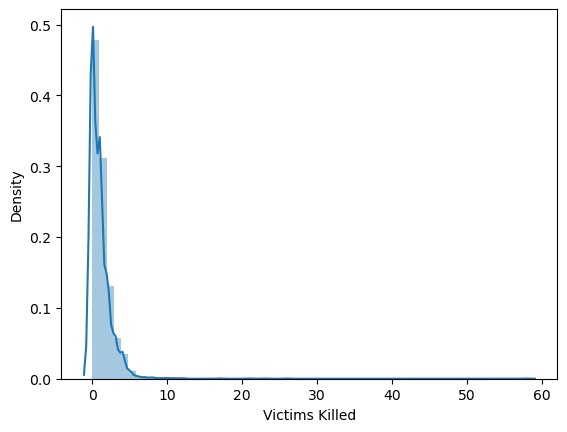

In [61]:
sns.distplot(Shootings['Victims Killed'], bins=60) # Shows extreme values

C:\Users\rendo\AppData\Local\Temp\ipykernel_39008\714675806.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Shootings['Suspects Killed'], bins=60) # Shows extreme values


<Axes: xlabel='Suspects Killed', ylabel='Density'>

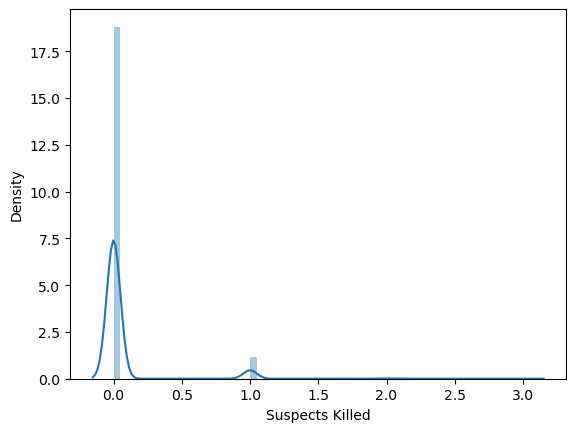

In [62]:
sns.distplot(Shootings['Suspects Killed'], bins=60) # Shows extreme values

In [63]:
# Define data types for specific columns
data_types = {
    'Suspects Killed': 'Victims Killed'
}

In [64]:
parse_killed = ['Suspects Killed']

In [65]:
# create subset
df_sub = Shootings[[ 'Suspects Killed', 'Suspects Injured', 'Suspects Arrested', 'Victims Killed']]

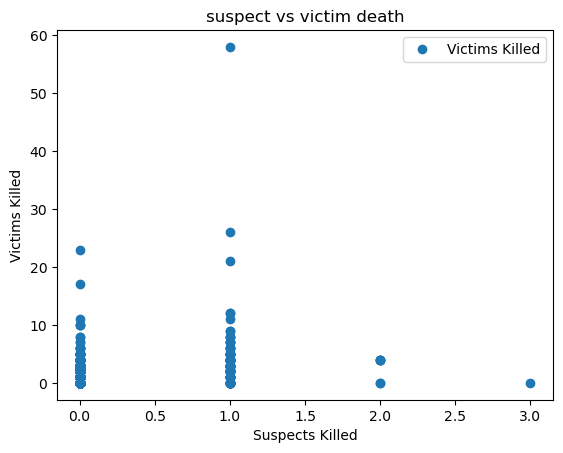

In [66]:
df_sub.plot(x = 'Suspects Killed', y= 'Victims Killed' ,style='o') 
plt.title('suspect vs victim death')  
plt.xlabel('Suspects Killed')  
plt.ylabel('Victims Killed')  
plt.show()

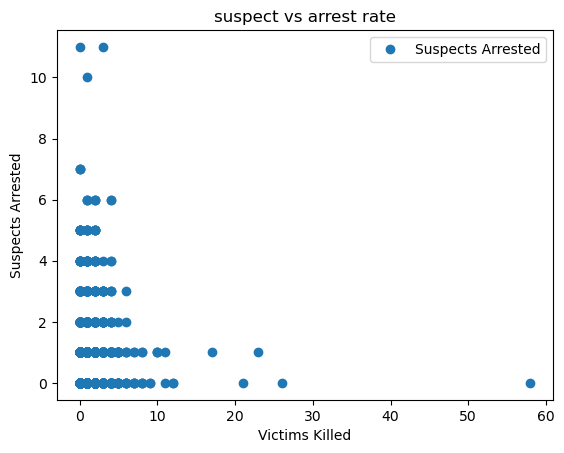

In [67]:
df_sub.plot(x = 'Victims Killed', y= 'Suspects Arrested' ,style='o') 
plt.title('suspect vs arrest rate')  
plt.xlabel('Victims Killed')  
plt.ylabel('Suspects Arrested')  
plt.show()

#### There looks to be more arrest when there is less victim deaths. Most arrest were made when there were little to no victims killed. More suspects get killed when at least one victim was killed.

In [68]:
X = Shootings['Victims Killed'].values.reshape(-1,1)
y = Shootings['Suspects Arrested'].values.reshape(-1,1)

In [69]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [70]:
# Create a regression object.

regression = LinearRegression() 

In [71]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [72]:
# Predict the values of y using X. applying model just to X test

#--By only applying it to the “X_test” data set, you’re telling the model to predict the corresponding y values. Once it does this, you can compare it to the actual y values in the “y_test” data set and determine the accuracy of the model.

y_predicted = regression.predict(X_test)

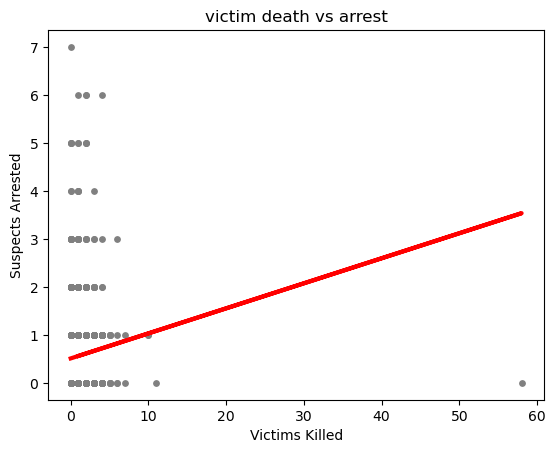

In [73]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('victim death vs arrest')
plot_test.xlabel('Victims Killed')
plot_test.ylabel('Suspects Arrested')
plot_test.show()

### Regression line appears to be positive which means the more victims killed the more arrest are made.

In [74]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [75]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.05216726]]
Mean squared error:  0.996626965045429
R2 score:  0.0011516271869429495


In [76]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1,0.510540
1,0,0.510540
2,1,0.562707
3,0,0.510540
4,1,0.719209
5,0,0.823543
6,0,0.510540
7,1,0.562707
8,1,0.510540
9,0,0.562707


### I feel like this prediction would be hard. every prediction looks to be a 50 50 chance that some one dies. Some actuals show 0 when the predictions is 0.6 or higher.

In [77]:
death_aggregated_filtered = Shootings.groupby('Suspects Arrested').agg({
    'Suspects Killed': 'count',          
    'Victims Killed': 'mean'             
}).reset_index()

In [78]:
death_aggregated_filtered

,Suspects Arrested,Suspects Killed,Victims Killed
0,0,2028,0.848619
1,1,692,1.507225
2,2,199,1.140704
3,3,98,1.091837
4,4,34,1.147059
5,5,19,0.842105
6,6,8,2.125000
7,7,3,0.000000
8,10,1,1.000000
9,11,2,1.500000


In [79]:
death_aggregated_filtered = death_aggregated_filtered.rename(columns={'Suspects Killed': 'Suspect Killed Count', 'Victims Killed': 'Victim_death_avg'})

In [80]:
X_1 = death_aggregated_filtered['Victim_death_avg'].values.reshape(-1,1)
y_1 = death_aggregated_filtered['Suspect Killed Count'].values.reshape(-1,1)

In [81]:
# Split data into a training set and a test set.

X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.3, random_state=42)

In [82]:
# Create a regression object.

regression = LinearRegression() 

In [83]:
# Fit the regression object onto the training set.

regression.fit(X_1_train, y_1_train)

LinearRegression()

In [84]:
# Predict the values of y using X. applying model just to X test

#--By only applying it to the “X_test” data set, you’re telling the model to predict the corresponding y values. Once it does this, you can compare it to the actual y values in the “y_test” data set and determine the accuracy of the model.

y_1_predicted = regression.predict(X_1_test)

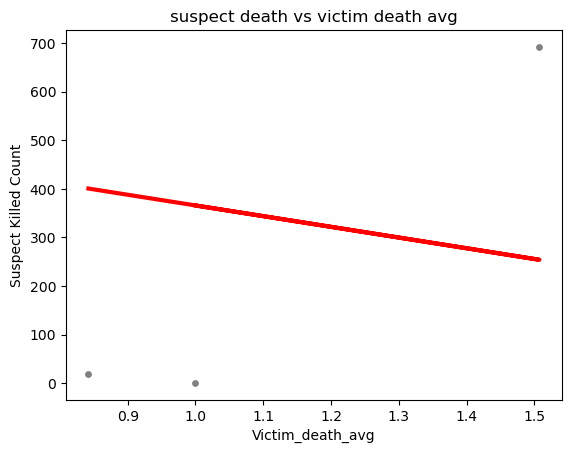

In [85]:
# Create a plot that shows the regression line from the model on the test set.

plot_test_1 = plt
plot_test_1.scatter(X_1_test, y_1_test, color='gray', s = 15)
plot_test_1.plot(X_1_test, y_1_predicted, color='red', linewidth =3)
plot_test_1.title('suspect death vs victim death avg')
plot_test_1.xlabel('Victim_death_avg')
plot_test_1.ylabel('Suspect Killed Count')
plot_test_1.show()

## Negative regression. 

In [86]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_1_test, y_1_predicted) # This is the mean squared error
r2 = r2_score(y_1_test, y_1_predicted) # This is the R2 score. 

In [87]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-220.22171241]]
Mean squared error:  156790.80527241048
R2 score:  -0.5161337691023371


In [88]:
# Create a dataframe comparing the actual and predicted values of y.

death_1 = pd.DataFrame({'Actual': y_1_test.flatten(), 'Predicted': y_1_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1,0.510540
1,0,0.510540
2,1,0.562707
3,0,0.510540
4,1,0.719209
5,0,0.823543
6,0,0.510540
7,1,0.562707
8,1,0.510540
9,0,0.562707


In [89]:
#check shape before export
death_1.shape

(3, 2)

In [90]:
death_1

,Actual,Predicted
0,1,365.699603
1,692,253.997549
2,19,400.471452


In [91]:
#check shape before export
Shootings.shape

(3084, 11)

In [92]:
#export file
Shootings.to_pickle(os.path.join(path, 
                                  '02 data', 
                                  'prepared data', 
                                  'Shootings.pkl'))

###### I feel like this is something that wouldn't be used as a predictive thing. I feel like this being inconsistent data and not constant variables it's hard to predict.